In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Описание датасетов:
Основной датасет содержит информацию о заказах такси одного из известных агрегаторов:
order_gk — идентификатор поездки;
weekday_key — день недели совершения поездки;
hour_key — час совершения поездки;
distance_km — дистанция поездки;
offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);
driver_response — статус поездки (1 — поездка совершена; 0 — отмена).

Доп. датасет содержит информацию о распространении COVID-19 в России и США:
date — дата фиксации значений;
country — страна;
confirmed — заражений зафиксировано;
deaths — смертей зафиксировано.

Датасет задания со звёздочкой содержит случайный семпл информации о состоявшихся поездках такси одного из известных агрегаторов:
order_gk — идентификатор поездки;
weekday_key — день недели совершения поездки;
hour_key — час совершения поездки;
distance_km — дистанция поездки;
offer_class_group — класс поездки (1 - Economy, 2 - Comfort, 3 - Premium).


1.Загрузите файл dip_hw_x_taxi.csv в pandas dataframe

In [ ]:
data = pd.read_csv('/content/dip_hw_x_taxi.csv')
data.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1


2.Рассчитайте основные описательные статистики 
(среднее, минимум, 25-50-75-персентили, максимум)


In [ ]:
data.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848,0.587000
std,270556.211847,2.007256,6.918465,18.876336,0.492496
min,412.000000,1.000000,0.000000,0.024000,0.000000
25%,227126.500000,2.000000,6.000000,12.177000,0.000000
50%,458637.000000,4.000000,12.000000,22.828500,1.000000
75%,709420.250000,6.000000,18.000000,36.434250,1.000000
max,919196.000000,7.000000,23.000000,138.950000,1.000000


3.Вычислите количество значений по классам такси

In [ ]:
data.groupby('offer_class_group').count()

,order_gk,weekday_key,hour_key,distance_km,driver_response
offer_class_group,,,,,
Comfort,500,500,500,500,500
Delivery,500,500,500,500,500
Economy,500,500,500,500,500
Premium,500,500,500,500,500


4.Визуализируйте распределение дистанций поездок

<Axes: >

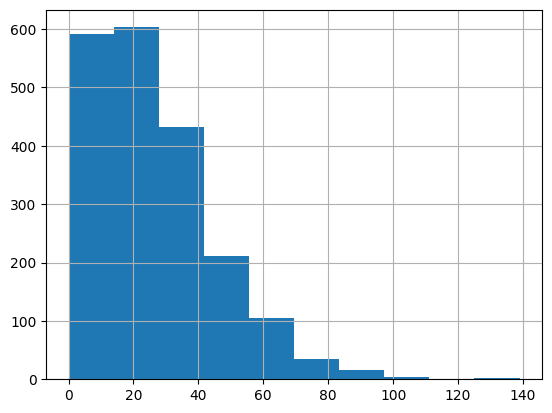

In [ ]:
data['distance_km'].hist()

5.Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса

In [ ]:
data['offer_class_group'].unique()

array(['Premium', 'Delivery', 'Comfort', 'Economy'], dtype=object)

Text(0.5, 1.0, 'дистанция от класса такси')

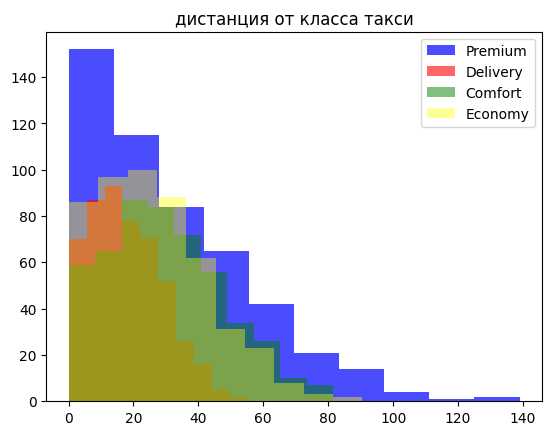

In [ ]:
fig, ax = plt.subplots()
alpha_1 = 0.7
for group,color in zip(data['offer_class_group'].unique(),['blue', 'red', 'green','yellow']):
  plt.hist(data[(data['offer_class_group'] == group)]['distance_km'],color = color, label = group,alpha=alpha_1)
  alpha_1 -= 0.1
ax.legend()
plt.title('дистанция от класса такси')



6.Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов (примечание: поможет функция sns.distplot)

In [ ]:
data_econom = data[(data['offer_class_group'] == 'Economy')]
data_econom.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
11,3845,3,7,83.830,Economy,0
13,4957,3,22,14.239,Economy,1
14,5150,5,3,4.334,Economy,0
20,8758,4,17,26.413,Economy,1
21,8985,3,23,21.296,Economy,1


In [ ]:
data_comfort = data[(data['offer_class_group'] == 'Comfort')]
data_comfort.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
6,2710,4,19,2.142,Comfort,1
15,6635,7,10,10.889,Comfort,1
16,7277,4,12,28.825,Comfort,1
17,7351,4,2,17.281,Comfort,0
23,9088,1,18,4.126,Comfort,0


In [ ]:
data_econom_comfort =  data[(data['offer_class_group'] == 'Comfort') | (data['offer_class_group'] == 'Economy')]
data_econom_comfort.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
6,2710,4,19,2.142,Comfort,1
11,3845,3,7,83.830,Economy,0
13,4957,3,22,14.239,Economy,1
14,5150,5,3,4.334,Economy,0
15,6635,7,10,10.889,Comfort,1


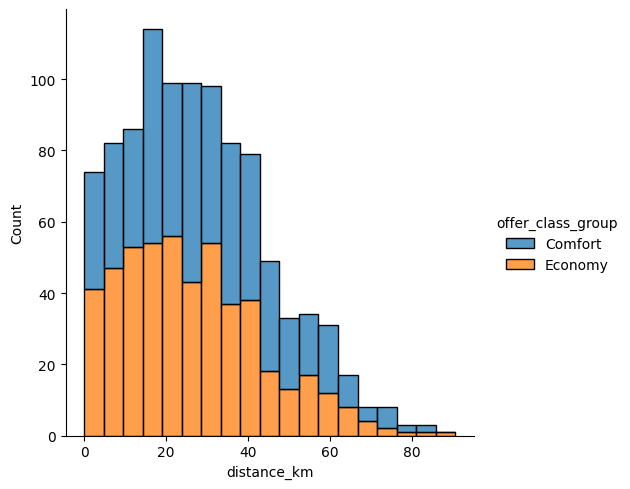

In [ ]:
sns.displot(data_econom_comfort, x='distance_km', hue = 'offer_class_group', multiple="stack")

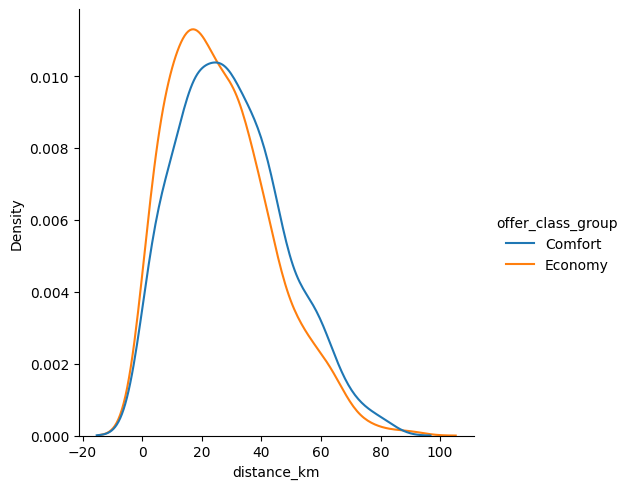

In [ ]:
# в лекции kde, мне одной кажется, что разные выводы напрашиваются?
sns.displot(data = data_econom_comfort[data_econom_comfort.offer_class_group.isin(['Economy','Comfort'])],x='distance_km', hue = 'offer_class_group', kind='kde')

7.Проведите стат. тест (поможет: функция scipy.stats.ttest_ind), проверьте гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)

In [ ]:
from scipy import stats
stats.ttest_ind(data_econom['distance_km'], data_comfort['distance_km'])

Ttest_indResult(statistic=-3.1706426042389815, pvalue=0.0015673809987275479)

8.Сделайте выводы по результатам проведения стат. теста

In [ ]:
0.0015673809987275479 < 0.05
# можем отвергнуть H0 => выборки отличны

True

9.Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)

In [ ]:
data_econom['distance_km'].mean(), data_comfort['distance_km'].mean()
# => комфорт-класс предпочитает более длительные поездки

(26.283098, 29.758916000000003)

10.Оформите презентацию для демонстрации результатов стейкхолдерам (примечание: для оформления воспользуйтесь шаблоном)

Дополнительное задание:
Вы справились с исследованием данных! Ваша стажировка продолжается, в мире произошли непредвиденные события — пандемия COVID-19. Вам доверена срочная задача. Чтобы сформировать понимание о стратегии компании, необходимо определить возможные сценарии дальнейшего развития событий


11.Загрузите файл dip_hw_covid.csv в pandas dataframe

In [ ]:
data_covid = pd.read_csv('/content/dip_hw_covid.csv')
data_covid.head()

,date,country,confirmed,deaths
0,2020-01-22 00:00:00,Russia,0.0,0.0
1,2020-01-22 00:00:00,US,1.0,0.0
2,2020-01-23 00:00:00,Russia,0.0,0.0
3,2020-01-23 00:00:00,US,1.0,0.0
4,2020-01-24 00:00:00,Russia,0.0,0.0


12.Исследуйте данные:
Рассчитайте коэффициент корреляции между заболеваемостью и смертностью
Визуализируйте динамики заболеваемости и смертности по доступным странам в отдельности, сравните характер распространения


In [ ]:
data_covid['confirmed']. corr(data_covid['deaths'])
# видно что значения сильно коррелированы

0.9898359549904744

In [ ]:
data_covid['country'].unique()

array(['Russia', 'US', nan], dtype=object)

In [ ]:
data_covid_Rus = data_covid[(data_covid['country'] == 'Russia')]
data_covid_Rus.head(-20)

,date,country,confirmed,deaths
0,2020-01-22 00:00:00,Russia,0.0,0.0
2,2020-01-23 00:00:00,Russia,0.0,0.0
4,2020-01-24 00:00:00,Russia,0.0,0.0
6,2020-01-25 00:00:00,Russia,0.0,0.0
8,2020-01-26 00:00:00,Russia,0.0,0.0
...,...,...,...,...
1066,2021-07-08 00:00:00,Russia,5638901.0,138441.0
1068,2021-07-09 00:00:00,Russia,5664200.0,139156.0
1070,2021-07-10 00:00:00,Russia,5688807.0,139896.0
1072,2021-07-11 00:00:00,Russia,5713351.0,140635.0


In [ ]:
data_covid_Us = data_covid[(data_covid['country'] == 'US')]
data_covid_Us.head(-20)

,date,country,confirmed,deaths
1,2020-01-22 00:00:00,US,1.0,0.0
3,2020-01-23 00:00:00,US,1.0,0.0
5,2020-01-24 00:00:00,US,2.0,0.0
7,2020-01-25 00:00:00,US,2.0,0.0
9,2020-01-26 00:00:00,US,5.0,0.0
...,...,...,...,...
1067,2021-07-08 00:00:00,US,33790505.0,606382.0
1069,2021-07-09 00:00:00,US,33838746.0,606886.0
1071,2021-07-10 00:00:00,US,33847784.0,607025.0
1073,2021-07-11 00:00:00,US,33853948.0,607053.0


Text(0, 0.5, 'Кол-во заражений')

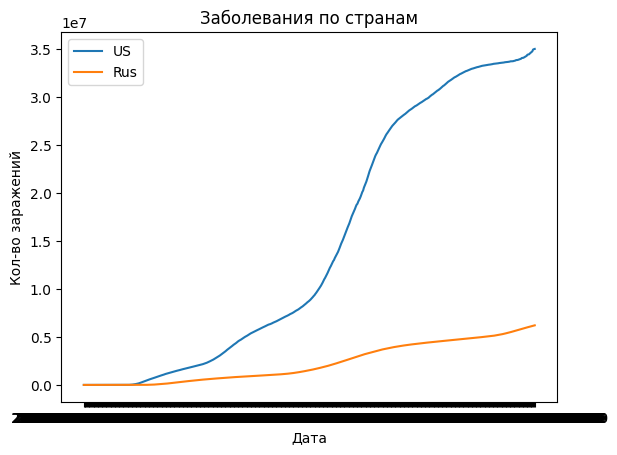

In [ ]:
plt.plot(data_covid_Us['date'], data_covid_Us['confirmed'], label = 'US')
plt.plot(data_covid_Rus['date'], data_covid_Rus['confirmed'], label='Rus')
plt.legend()
plt.title('Заболевания по странам')
plt.xlabel('Дата')
plt.ylabel('Кол-во заражений')

Text(0, 0.5, 'Кол-во смертей')

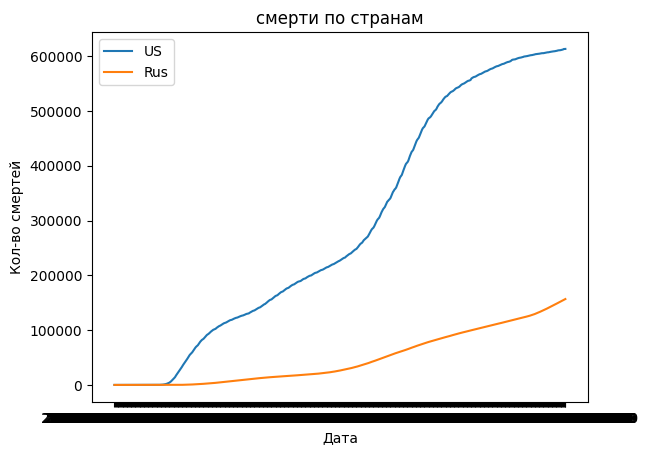

In [ ]:
plt.plot(data_covid_Us['date'], data_covid_Us['deaths'], label = 'US')
plt.plot(data_covid_Rus['date'], data_covid_Rus['deaths'], label='Rus')
plt.legend()
plt.title('смерти по странам')
plt.xlabel('Дата')
plt.ylabel('Кол-во смертей')

13.Постройте модель линейной регрессии по смертям от заболеваемости и вычислите прогноз количества смертей в России для 25 000 000 случаев заражений (примечание: сформируйте выборку по России, выделите признак и целевую переменную [используем 100% данных для обучения], постройте прогноз смертей для 25 000 000 заболевших [поможет метод predict], сделайте выводы по полученному прогнозу)

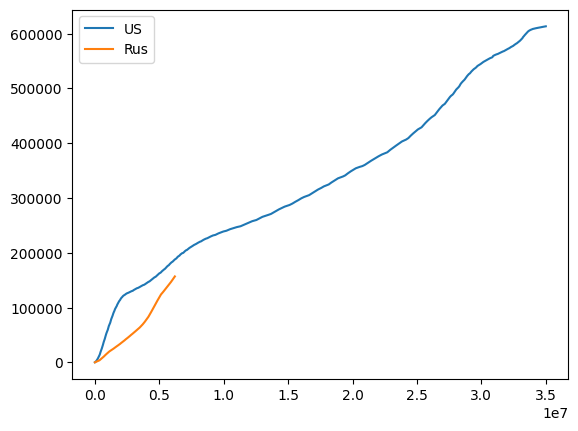

In [ ]:
plt.plot(data_covid_Us['confirmed'], data_covid_Us['deaths'], label = 'US')
plt.plot(data_covid_Rus['confirmed'], data_covid_Rus['deaths'], label='Rus')
plt.legend()
# по России меньше данных

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

x = data_covid_Rus[['confirmed']]
y = data_covid_Rus['deaths']#.values.reshape(1, -1)
model.fit(x, y)

LinearRegression()

In [ ]:
type(y), type(x)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [ ]:
print(model.intercept_, model.coef_[0])

-5713.8279207801315 0.02352536850263536


In [ ]:
print("The linear model is: Y = {:.5} + {:.5}X".format(model.intercept_, model.coef_[0]))

The linear model is: Y = -5713.8 + 0.023525X


In [ ]:
y_pred = model.predict(x)
# y_pred

In [ ]:
len(y_pred)

558

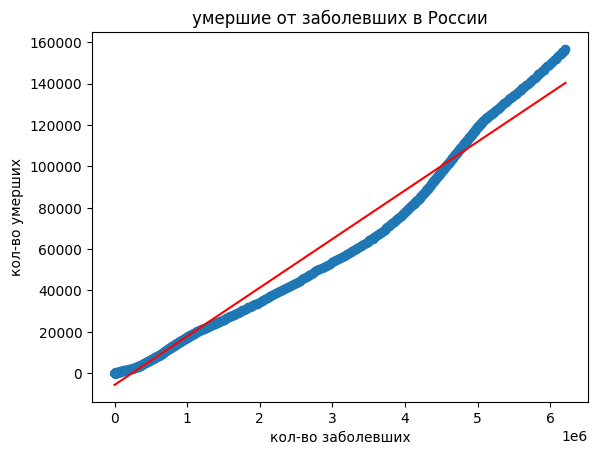

In [ ]:
# plt.scatter( x, y, color='blue')
# # plt.scatter( x, y_pred, color='red')
# # plt.plot(x, x, color = 'red')
plt.plot(x, y, 'o');
plt.plot(x, y_pred, 'r-');
plt.title('умершие от заболевших в России')
plt.xlabel('кол-во заболевших')
plt.ylabel('кол-во умерших')
plt.show();

In [ ]:
# model.predict([25000000].reshape(-1, 1))
# прогноз количества смертей в России для 25 000 000 случаев заражений
pred_25000000 = model.coef_[0]*25000000 + model.intercept_
pred_25000000

582420.3846451038

In [ ]:
df_25000000 = pd.DataFrame([25000000,])
model.predict(df_25000000)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([582420.3846451])

14.Дополните шаблон презентации отдельными слайдами с информацией по построению модели, получению прогноза и рекомендациями для бизнеса с учётом полученной информации (создайте разделы: “Построение модели” и “Рекомендации для бизнеса”).

Задание со звёздочкой:
Вы исследовали данные компании! Но у инфраструктурного отдела произошли неполадки, возникло подозрение о сбое работы логики записи состоявшихся поездок. Вам доверена задача проверить наличие ошибок в имеющихся данных, чтобы удостовериться в корректности сделанных выводов и помочь коллегам.


15.Загрузите файл dip_db_check_taxi.csv (содержит случайный семпл данных заказанных поездок) в pandas dataframe; проверьте предположение компании о нарушении работы базы данных (фантомном задвоении
фиксации заказов такси), для этого постройте коллаборативную фильтрацию по идентификаторам поездок для определения наиболее похожих/идентичных записей, после, удалите дубликаты получившихся пар и сделайте выводы о наличии задвоений и корректности работы базы.

In [ ]:
data_check = pd.read_csv('/content/dip_db_check_taxi.csv')
data_check.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group
0,4957,3,27,14.239,1
1,9314,3,21,39.518,2
2,13922,2,21,17.203,2
3,37826,5,19,36.971,2
4,38936,2,19,49.634,2


In [ ]:
len(data_check), len(data_check['order_gk'].unique())

(100, 100)

In [ ]:
len(data_check['hour_key'].unique())

15

In [ ]:
data_del_dup = data_check.drop_duplicates(inplace=False)
len(data_del_dup)
# просто одинаковых строк нет

100

In [ ]:
# для каждой записи найду похожее
# и если оно ближе Х - надо удалить

In [ ]:
from scipy.spatial.distance import cityblock, cosine, euclidean, hamming, jaccard

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
# т.к данные в разном масштабе, думаю необходимо их подравнять
# для оценки их косинусной близости
# все столбцы, кроме номера поездки
scaler = MaxAbsScaler()
scaler.fit(data_check.iloc[:,1:])
scaler_data_check = scaler.transform(data_check.iloc[:,1:])

In [ ]:

all_ride = []
distances = []
col_2 = 0
for k in range(len(data_check)):
  col= 0
  one_ride_all = data_check.iloc[[k]]
  # наверно не нужно больше в лист. скалер сам переводит
  # one_ride_all_list = one_ride_all.values.tolist()[0]
  for i in range(len(data_check)):
    ride = data_check.iloc[[i]]
    if ride.loc[i,'order_gk'] == one_ride_all.loc[k, 'order_gk']:
      continue
    dist = cosine(scaler.transform(one_ride_all.iloc[:,1:])[0],scaler.transform(ride.iloc[:,1:])[0]) #не учитывая индификатор поездки для разницы поездок
    if dist < 3.0e-4: # вот тут можно подбирать бесконечно =)
      if [i,k] not in all_ride:# убрать зеркальные пары близжайших поездок
        all_ride.append([k,i])#добавляю строку
        distances.append(dist)
        col+=1
  col_2 += col
print(f" кол-во пар = {col_2}") 

 кол-во пар = 4


In [ ]:
best_indexes = np.argsort(distances)#[:10]
best_indexes

array([1, 3, 0, 2])

In [ ]:
near = [([all_ride[i]], distances[i]) for i in best_indexes]
for n in near:
  print(n)

([[10, 43]], 2.730574166776023e-08)
([[79, 98]], 6.985602988829331e-05)
([[9, 82]], 7.457648612063661e-05)
([[49, 69]], 0.00024472350205007043)


In [ ]:
# таблица ближайших строк (0 ,ближайшая к 1, 2 к 3 итд)
near_df = pd.DataFrame()

for i in near:
  ride = data_check.iloc[i[0][0]]
  near_df = pd.concat([near_df, ride], ignore_index=True)
  # new_df.append(data_check.iloc[i[0][0]])
  # print(data_check.iloc[i[0][0]])
  # print('----'*10)
near_df
# даже самые близкие пары не так уж и близки. на сбой в логике записи данных совсем не похоже =)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group
0,94794,2,20,57.879,3
1,330292,2,20,57.846,3
2,674519,4,20,30.600,3
3,848459,4,20,29.096,3
4,86889,2,24,9.565,3
5,699904,2,24,11.013,3
6,412671,3,21,22.122,3
7,597863,3,20,22.563,3


In [ ]:
# кол-во близжайших пар
len(near_df) / 2

4.0

In [ ]:
# удалим order_gk = 94794
len(data_check)
data_check = data_check[data_check.order_gk != 94794]
len(data_check)
# 

99

In [ ]:
data_check.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group
0,4957,3,27,14.239,1
1,9314,3,21,39.518,2
2,13922,2,21,17.203,2
3,37826,5,19,36.971,2
4,38936,2,19,49.634,2


Максимальная оценка –  200 баллов.
Для зачёта необходимо набрать 80 и более баллов.
Результат: решение необходимо предоставить в виде ссылок на ноутбук и презентацию.
Убедитесь, что к ноутбуку и презентации предоставлен доступ по ссылке, иначе преподаватель не сможет проверить работу. Для этого можно открыть браузер в режиме инкогнито и убедиться, что ссылки открываются корректно.


Критерии оценки задания:
– Выполнены пункты задания.
– Оформлена презентация проекта.
